<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.3.0+cpu
cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

- __Facial recognition:__ Algorithms are used to identify people based on an image of their facial features.
- __Object detection:__ Software can be trained to identify objects given an image or a video feed. Used for vehile obstacle avoidance.
- __Vehicle localization:__ Videos can be interpreted by a computer to determine the position and velocity of an object. 

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a condition where a model behaves very accurately during training, but provides mediocre results when tested against a different data set.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

This is a complex topic as it's not an precisely defined condition. Despite that, there are rules of thumb that help us identify it:  

- The training accuracy is large, but the testing error beings to decrease: At some point, more training will not cause the testing accuracy to increase, and it may even decrease. Training any further causes over-fitting.

- Model convergence occurs in approximately two phases: A initial phase with rapid accuracy improvement with eposh, and a second much slower phase where accuracy claws with epochs. Once the model enters the second phase overfitting begins to occur.

- Reducing the complexity of a model can prevent overfitting, in the same way reducing the number of datapoints on a polynomial curve-fit can improve overall accuracy. The simplest model that captures the trends in the data is less suceptible to capture the "noise" in the data, as opposed to its overall trend. 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

![image](./images/pigeon-cnn.png)

__Observation:__ Since the neural network was only trained on a specific set of labels, when a different image that falls outside of these categories is uploaded, the classification fails. This tells us that, while the neural network may work very well with data inside its training space, it fails outside of it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# load libraries
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])


/tmp/ipykernel_52807/3599478318.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


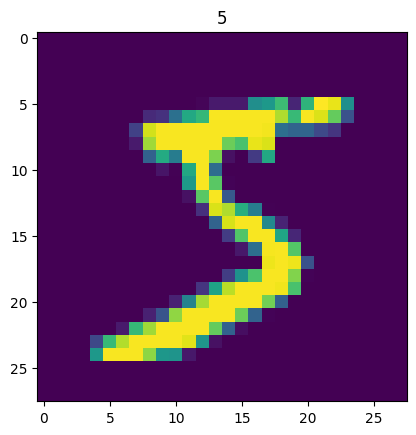

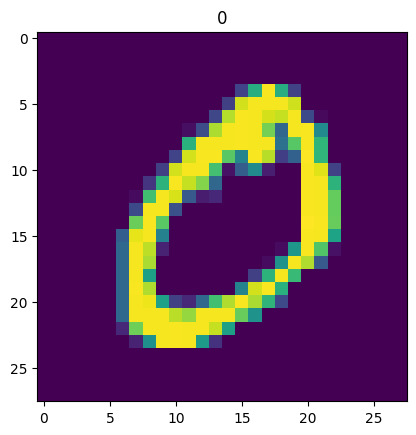

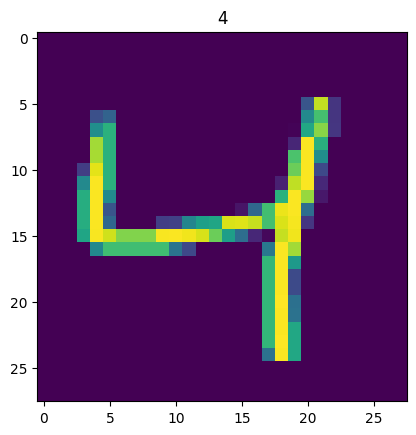

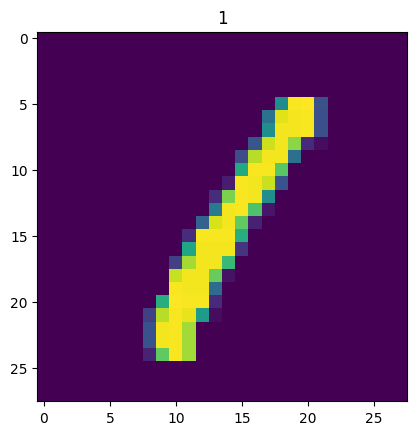

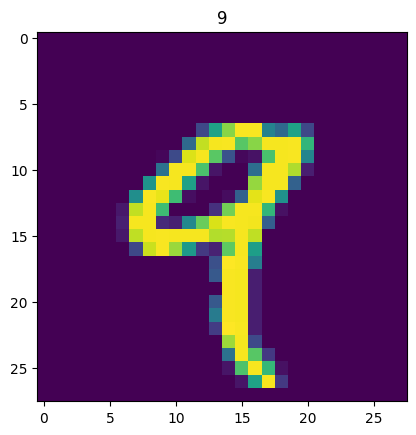

In [4]:
import matplotlib.pyplot as plt

def displayImage(data):
    image, label = data
    print(f"Image shape: {image.shape}")
    figure = plt.figure(i)
    plt.imshow(image.squeeze()) 
    plt.title(label)
    figure.show()

# show multiple images
for i in range(5):
    displayImage(train_data[i])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
# neural network
from torch import nn

# Create a convolutional neural network 
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(), # non-linear layer
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [7]:
# seeding
NUM_SEED = 42
torch.manual_seed(NUM_SEED)

# labels of data
class_names = train_data.classes

# create model
model_2 = MNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

In [8]:
# display model
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

__Training functions__: sub-steps to train neural network

In [9]:
# training function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [10]:
# testing function
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [11]:
from timeit import default_timer as timer 

# helper function | training time
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

__Training loop__: iterate across epochs

In [12]:
# Setup loss and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [13]:
# Measure time
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_model = timer()

# Train and test model 
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)

/home/user/miniconda3/envs/machine_learn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.26263 | Train accuracy: 91.33%


 33%|█████████████████████████████████▎                                                                  | 1/3 [00:29<00:58, 29.28s/it]

Test loss: 0.06812 | Test accuracy: 97.76%

Epoch: 1
---------
Train loss: 0.06949 | Train accuracy: 97.81%


 67%|██████████████████████████████████████████████████████████████████▋                                 | 2/3 [00:57<00:28, 28.84s/it]

Test loss: 0.04125 | Test accuracy: 98.67%

Epoch: 2
---------
Train loss: 0.05379 | Train accuracy: 98.32%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:27<00:00, 29.10s/it]

Test loss: 0.04304 | Test accuracy: 98.65%

Train time on cpu: 87.307 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [14]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [15]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [16]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)

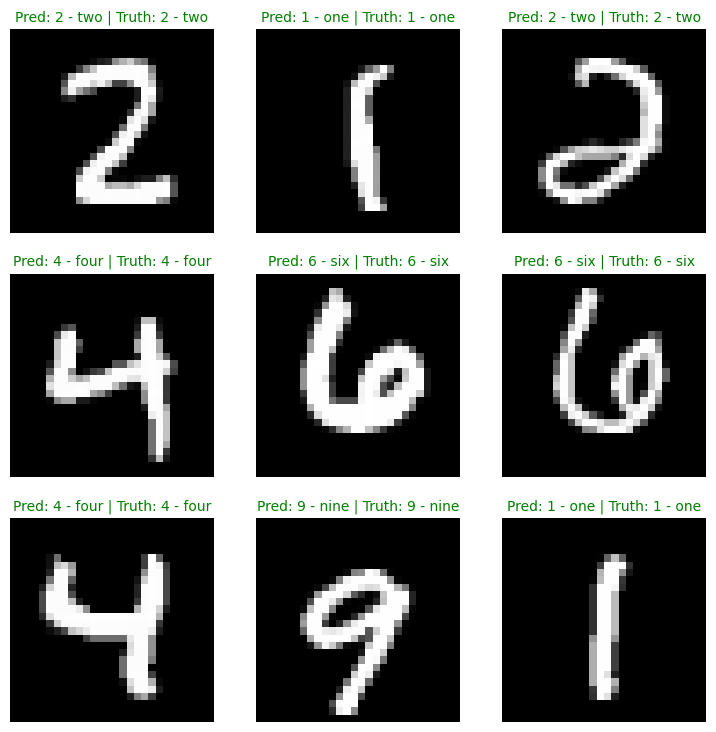

In [17]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [18]:
# Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|███████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 128.16it/s]


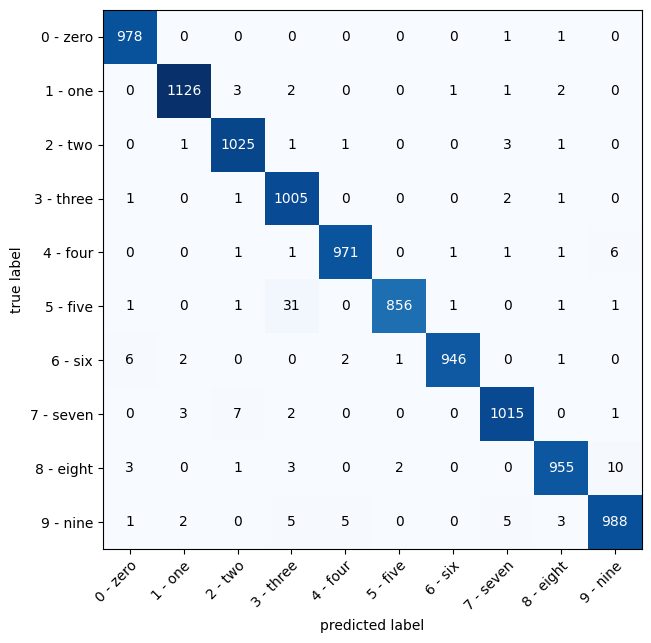

In [19]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [20]:
# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(1, 3, 64, 64)) # [batch_size, color_channels, height, width]

test_image = images[0] # get a single image for testing

In [21]:
# Create a convolutional layer with same dimensions as TinyVGG 
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Add extra dimension to test image
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [22]:
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [23]:
conv_layer_3 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(14, 14), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_3(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 26, 26])

__Observation__: The size of the convolution layer decreases as the kernel size increases. However, the decrease in size becomes slower as as the kernal size grows large. That is, it is a non-linear relationship.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [24]:
###  Get dataset ###

# Setup training data
train_data_fash = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data_fash = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

# labels
class_names_fashion = train_data_fash.classes

In [25]:
### create datasets ####

# Turn datasets into iterables (batches)
train_dataloader_fash = DataLoader(train_data_fash, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader_fash = DataLoader(test_data_fash,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

In [26]:
# hyperparameters
KERNEL_SIZE = 3
HIDDEN_UNITS = 6 # default 10

# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=KERNEL_SIZE, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.GELU(), # ReLU, SiLU, SELU, GELU        
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=KERNEL_SIZE,
                      stride=1,
                      padding=1),
            nn.GELU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.GELU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.GELU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

# create instance of model
model_fashion = FashionMNISTModelV2( 
    input_shape=1, hidden_units=HIDDEN_UNITS, 
    output_shape=len(class_names_fashion)
).to(device)

In [27]:
# Momentum hurts solution?
optimizer_fash = torch.optim.SGD(params=model_fashion.parameters(), 
                             lr=0.1, momentum=0.5) 
# NOTE: too much learning rate or momentum causes massive decay in convergence. 
# Approximately, LR > 0.2 and Momentum > 0.5 causes instability

In [28]:
# begin timer
train_time_start_model = timer()

# training loop
for epoch in tqdm(range(6)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader_fash, 
        model=model_fashion, 
        loss_fn=loss_fn,
        optimizer=optimizer_fash,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader_fash,
        model=model_fashion,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)

  0%|                                                                                                            | 0/6 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59154 | Train accuracy: 78.18%


 17%|████████████████▋                                                                                   | 1/6 [00:22<01:51, 22.29s/it]

Test loss: 0.38700 | Test accuracy: 86.25%

Epoch: 1
---------
Train loss: 0.35700 | Train accuracy: 87.14%


 33%|█████████████████████████████████▎                                                                  | 2/6 [00:43<01:27, 21.89s/it]

Test loss: 0.35279 | Test accuracy: 87.14%

Epoch: 2
---------
Train loss: 0.32431 | Train accuracy: 88.27%


 50%|██████████████████████████████████████████████████                                                  | 3/6 [01:05<01:05, 21.89s/it]

Test loss: 0.33460 | Test accuracy: 88.14%

Epoch: 3
---------
Train loss: 0.30626 | Train accuracy: 88.84%


 67%|██████████████████████████████████████████████████████████████████▋                                 | 4/6 [01:27<00:44, 22.01s/it]

Test loss: 0.32828 | Test accuracy: 88.62%

Epoch: 4
---------
Train loss: 0.29782 | Train accuracy: 89.19%


 83%|███████████████████████████████████████████████████████████████████████████████████▎                | 5/6 [01:50<00:22, 22.28s/it]

Test loss: 0.33573 | Test accuracy: 88.30%

Epoch: 5
---------
Train loss: 0.28938 | Train accuracy: 89.49%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:13<00:00, 22.26s/it]

Test loss: 0.33721 | Test accuracy: 87.98%

Train time on cpu: 133.583 seconds


In [29]:
y_preds_fash = []
model_fashion.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader_fash, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_fashion(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds_fash.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor_fash = torch.cat(y_preds_fash)

Making predictions: 100%|███████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 148.30it/s]


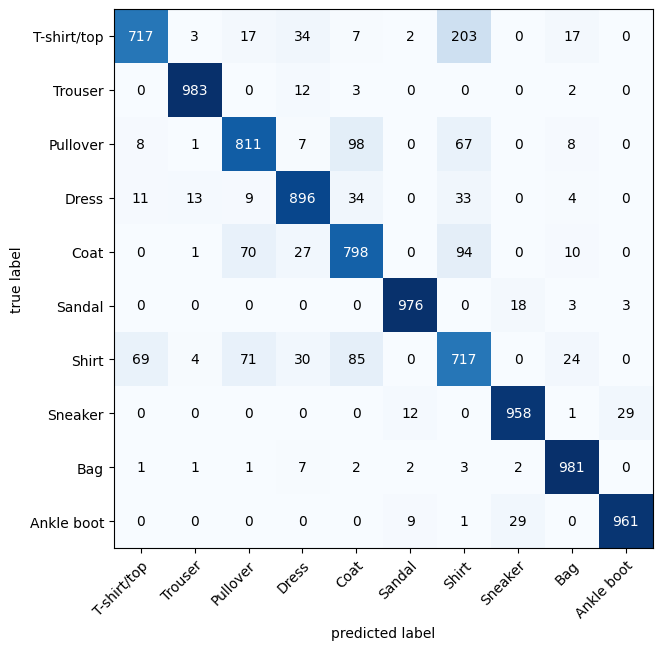

In [30]:
# Setup confusion matrix instance and compare predictions to targets
confmat_fash = ConfusionMatrix(num_classes=len(class_names_fashion), task='multiclass')
confmat_tensor_fash = confmat_fash(preds=y_pred_tensor_fash,
                         target=test_data_fash.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor_fash.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names_fashion, # turn the row and column labels into class names
    figsize=(10, 7)
);

__Analysis of results__: As shown above, there is significant overlap between the T-Shirt and Shirt classes. These categories have the most overlap along with coat and dress. 

Despite training the model with different hyperparameters like learning rate, momentum, activation functions (Relu, Silu, GELU, etc), and changing the number of epochs and hidden layers, the model never converted to more than ~89% accuracy. By looking at the confusion matrix, it's clear that certains data labels are very ambigous and even overlap, so the model cannot consistently select the correct label. If a person were asked to sort the same data, it's very likely their accuracy would converge to a similar value as the trained model. 

Therefore, its a good idea to reorganize the data to increase the convergent accuracy. We note then, that both data selection __AND__ hyperparameters determine the performance of a model.